# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,134,102,54,100,163,53,10,213,31,24,173,219,669,201,76,12,27,187,195
1,809,79,38,55,120,55,5,142,48,19,128,153,295,145,81,4,2,180,183
2,617,83,37,49,112,55,5,122,55,17,128,144,219,146,85,8,16,180,184
3,316,91,41,66,131,56,9,126,53,18,144,159,237,155,72,3,10,191,194
4,55,94,36,66,151,61,8,133,50,18,135,154,265,119,62,9,3,201,208
5,374,87,36,53,117,58,4,118,57,17,125,138,205,138,85,9,15,180,183
6,446,101,52,101,197,62,9,188,35,22,162,208,527,203,67,14,15,193,202
7,404,103,48,101,204,62,12,200,33,23,158,215,595,164,66,8,22,192,202
8,665,90,47,85,161,64,10,163,42,20,160,177,389,185,73,9,0,185,195
9,738,100,50,98,204,63,6,218,30,24,156,232,719,213,77,8,7,189,189


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,413.020036,93.852459,44.899818,82.034608,168.668488,61.519126,8.473588,169.107468,40.868852,20.615665,148.085610,188.599271,441.568306,174.848816,72.446266,6.389800,12.510018,188.987250,195.701275
std,243.315829,8.376959,6.166706,15.832168,33.044917,7.557933,4.169508,33.348214,7.877548,2.606808,14.510063,31.580561,177.378985,32.533263,7.631770,4.846284,8.767391,6.191723,7.539314
min,1.000000,76.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,202.000000,88.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,167.000000,320.000000,150.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,409.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,610.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,604.000000,197.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

__Что видим сразу?__

- все значения в X числовые, one hot encoding не нужен
- NA отсутствуют

Поглядим на матрицу корреляции признаков:

In [6]:
corr_matr = X_train_pd.corr()
corr_matr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.106497,0.063981,0.085328,0.067814,-0.046404,-0.030973,0.091689,-0.089922,0.083719,0.053951,0.067736,0.087384,0.044111,-0.081322,-0.015363,0.077707,0.045739,0.059424
1,0.106497,1.000000,0.699039,0.792870,0.706563,0.097623,0.181154,0.811508,-0.786800,0.809984,0.672711,0.764491,0.817632,0.593940,-0.269846,0.211962,0.159372,0.311888,0.379858
2,0.063981,0.699039,1.000000,0.799288,0.629931,0.142420,0.286656,0.863361,-0.828789,0.862025,0.964434,0.809515,0.855149,0.934777,0.036081,0.126665,-0.029362,-0.099728,0.048613
3,0.085328,0.792870,0.799288,1.000000,0.778868,0.157293,0.302642,0.907970,-0.912455,0.895987,0.772838,0.861850,0.889430,0.707660,-0.244882,0.099071,0.273201,0.150936,0.342703
4,0.067814,0.706563,0.629931,0.778868,1.000000,0.649204,0.421344,0.749550,-0.806889,0.722626,0.567610,0.792563,0.735847,0.547559,-0.223282,0.060768,0.194286,0.403998,0.493491
5,-0.046404,0.097623,0.142420,0.157293,0.649204,1.000000,0.596039,0.109495,-0.196514,0.083871,0.113027,0.264431,0.094263,0.120213,0.117018,-0.027804,-0.024216,0.272402,0.295048
6,-0.030973,0.181154,0.286656,0.302642,0.421344,0.596039,1.000000,0.208998,-0.223003,0.205486,0.339771,0.342611,0.182849,0.225699,0.292926,0.067700,0.050887,-0.045286,0.130419
7,0.091689,0.811508,0.863361,0.907970,0.749550,0.109495,0.208998,1.000000,-0.972954,0.992102,0.808711,0.952667,0.996108,0.809845,-0.039323,0.046090,0.205314,0.011469,0.128362
8,-0.089922,-0.786800,-0.828789,-0.912455,-0.806889,-0.196514,-0.223003,-0.972954,1.000000,-0.950091,-0.770499,-0.937944,-0.955329,-0.771189,0.116469,-0.026908,-0.192383,-0.121139,-0.228981
9,0.083719,0.809984,0.862025,0.895987,0.722626,0.083871,0.205486,0.992102,-0.950091,1.000000,0.812573,0.939412,0.992062,0.809345,-0.023467,0.054636,0.203011,-0.018959,0.102596


<AxesSubplot:>

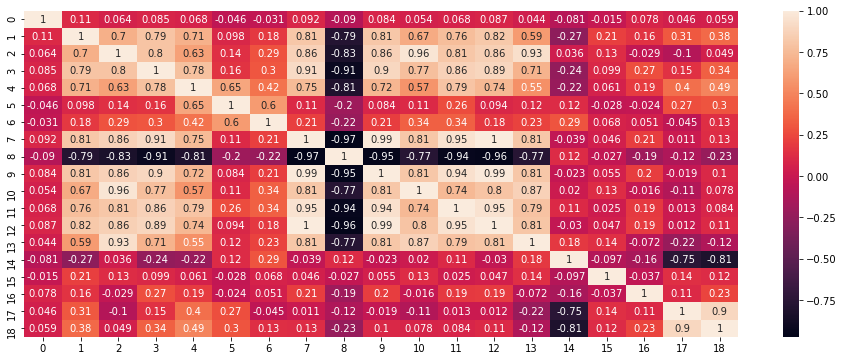

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(X_train_pd.corr(), annot=True)

<AxesSubplot:>

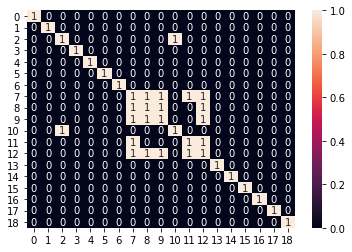

In [8]:
# выделим графически те признаки, которые имеют корреляцию выше 0.95
threshold = 0.95
sns.heatmap(abs(corr_matr) > threshold, annot=True)

Видим, что достаточно высокая корреляция у множества признаков. Обратившись к матрице корреляций (см. выше), можем увидеть, что коррелируют признаки

- 10 и 2 (оставим 2)
- 7, 8, 9, 11, 12 (оставим 7)

Можем дропнуть все, кроме одного из каждой категории. 

In [9]:
X_test_pd = pd.DataFrame(X_test)

X_test_pd.drop(columns=[8, 9, 10, 11, 12], inplace=True)
X_train_pd.drop(columns=[8, 9, 10, 11, 12], inplace=True)

Также поглядим на балансировку:

In [10]:
uni, count = np.unique(y_train, return_counts=True)
dict(zip(uni, count))

{'bus': 148, 'opel': 140, 'saab': 131, 'van': 130}

Видим, что метки сбалансированы, однако они имеют тип объекта:

In [11]:
y_train.dtype

dtype('O')

Заменим метки со стрингов на числовые:

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_labels = le.fit_transform(y_train)

y_train = new_labels
y_train

array([1, 2, 3, 3, 3, 3, 2, 1, 3, 0, 2, 1, 0, 2, 1, 3, 1, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 3, 1, 3, 1, 3, 0, 1, 2,
       0, 3, 2, 0, 0, 1, 2, 3, 0, 2, 3, 1, 2, 0, 1, 0, 2, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 0, 0, 3, 2, 0, 0, 2,
       2, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 3, 1, 3, 1, 1, 2, 1, 3, 0, 3,
       0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0,
       3, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 3, 1, 2, 2, 1, 3, 3, 1, 2, 0,
       3, 1, 3, 3, 1, 0, 0, 1, 3, 3, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1,
       3, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 3, 1, 1, 2, 0, 2, 0, 2, 1, 2, 3,
       1, 2, 1, 0, 2, 1, 3, 2, 1, 0, 0, 0, 2, 3, 0, 1, 2, 0, 1, 3, 1, 1,
       2, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 0, 1, 0, 3, 3, 2, 2, 0, 2, 1, 0,
       3, 3, 1, 2, 0, 3, 2, 3, 3, 1, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2,
       3, 0, 1, 2, 3, 2, 0, 1, 3, 2, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 3, 3,
       3, 0, 0, 2, 3, 0, 0, 3, 2, 1, 2, 0, 0, 0, 2,

In [13]:
test_labels = le.fit_transform(y_test)

y_test = test_labels
y_test

array([3, 0, 0, 1, 0, 3, 2, 3, 2, 1, 0, 2, 0, 3, 0, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 3, 1, 0, 0, 1, 2, 3, 0, 1, 1, 1, 2, 3, 3, 0, 3, 2, 3, 0, 3,
       2, 0, 0, 3, 2, 0, 3, 1, 2, 3, 0, 2, 2, 2, 0, 3, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 0, 2, 0, 2, 2, 3, 1, 1, 1, 3, 2, 1, 0, 0, 0, 1, 2, 1, 1,
       1, 2, 2, 0, 0, 3, 0, 1, 0, 1, 2, 1, 0, 3, 2, 1, 3, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 3, 0, 1, 3, 1, 1, 3, 2, 2, 2, 3, 0, 2, 0, 3,
       0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 3, 3, 0, 0, 3, 0, 2, 0, 2, 3,
       2, 1, 2, 0, 3, 0, 2, 3, 1, 2, 2, 2, 0, 2, 3, 1, 3, 1, 1, 2, 2, 0,
       2, 3, 1, 2, 3, 1, 0, 0, 3, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 3,
       3, 2, 2, 1, 2, 2, 3, 1, 2, 0, 2, 2, 0, 3, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 2, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 3, 0, 3, 1, 2, 2, 3, 2,
       3, 2, 1, 3, 1, 1, 3, 1, 2, 2, 1, 1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 1,
       2, 3, 2, 2, 0, 0, 2, 0, 0, 1, 0, 3, 2, 3, 0, 0, 2, 0, 1, 1, 1, 2,
       1, 0, 1, 3, 3, 1, 0, 2, 3, 0, 1])

Мы видели характеристики каждой фичи выше в `describe()`. Посмотрим на их распределение визуально:

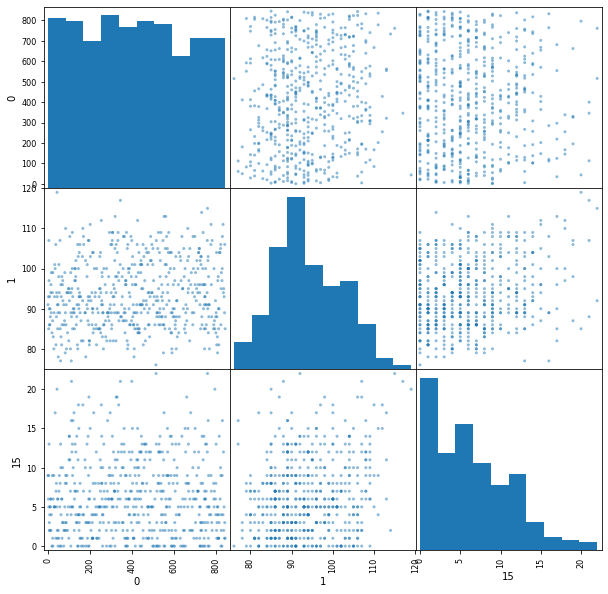

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train_pd[[0, 1, 15]], figsize=(10, 10))
plt.show()

Видим большую разницу в порядках значений. Поэтому заскейлим данные:

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_pd)
X_test_scaled = ss.fit_transform(X_test_pd)

In [16]:
train_columns = X_train_pd.columns
test_columns = X_test_pd.columns

X_train_pd = pd.DataFrame(X_train_scaled)
X_test_pd = pd.DataFrame(X_test_scaled)

X_train_pd.columns = train_columns
X_test_pd.columns = test_columns

In [17]:
X_train_pd

,0,1,2,3,4,5,6,7,13,14,15,16,17,18
0,-1.147786,0.973500,1.477042,1.135775,-0.171695,-1.128205,0.366423,1.317389,0.804562,0.466075,1.158685,1.654220,-0.321245,-0.093101
1,1.628916,-1.774630,-1.119903,-1.709132,-1.474141,-0.863341,-0.833853,-0.813602,-0.918323,1.121828,-0.493570,-1.199856,-1.452818,-1.686209
2,0.839099,-1.296694,-1.282212,-2.088453,-1.716457,-0.863341,-0.833853,-1.413882,-0.887557,1.646431,0.332558,0.398427,-1.452818,-1.553450
3,-0.399105,-0.340823,-0.632976,-1.013710,-1.140957,-0.730909,0.126368,-1.293826,-0.610665,-0.058528,-0.700102,-0.286551,0.325368,-0.225860
4,-1.472763,0.017629,-1.444521,-1.013710,-0.535169,-0.068749,-0.113687,-1.083728,-1.718234,-1.370035,0.539090,-1.085693,1.941900,1.632767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0.073963,0.615048,0.340878,0.566793,1.736539,1.652867,-0.833853,0.987235,0.343075,0.859527,-0.493570,-0.172388,0.487021,-0.624137
545,-1.164241,0.734532,0.178569,1.388655,0.464383,-0.201181,0.126368,0.837165,0.712265,0.072623,1.365217,0.055938,0.002061,0.172417
546,-1.616740,-1.177210,0.340878,-0.444729,-0.474590,0.328547,-0.593798,-0.453435,0.281544,0.334924,-1.319697,-1.085693,-0.644552,-0.491378
547,-0.279809,0.854016,1.477042,1.515096,0.585541,-0.598477,-0.353743,2.007710,2.404384,1.121828,-0.080506,0.170101,-0.644552,-1.420691


Теперь посмотрим на боксплоты каждой фичи, чтобы убрать выбросы:

<AxesSubplot:>

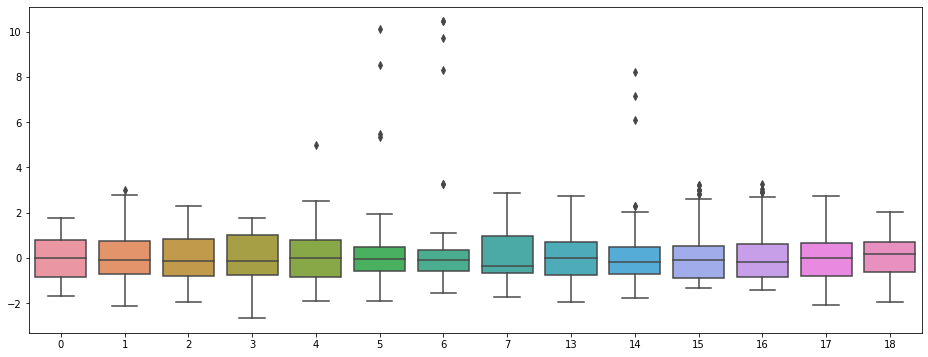

In [18]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=X_train_pd)

Видим выбросы в фичах 1, 4, 5, 6, 13, 14, 15, 16. Уберем все строки, которые содержат значения с выбросами.

In [19]:
columns = [1, 4, 5, 6, 13, 14, 15, 16]

for c in columns:
    q_low = X_train_pd[c].quantile(0.01)
    q_high = X_train_pd[c].quantile(0.99)
    X_train_pd = X_train_pd[(X_train_pd[c] < q_high) & (X_train_pd[c] > q_low)]

In [20]:
X_train_pd

,0,1,2,3,4,5,6,7,13,14,15,16,17,18
0,-1.147786,0.973500,1.477042,1.135775,-0.171695,-1.128205,0.366423,1.317389,0.804562,0.466075,1.158685,1.654220,-0.321245,-0.093101
1,1.628916,-1.774630,-1.119903,-1.709132,-1.474141,-0.863341,-0.833853,-0.813602,-0.918323,1.121828,-0.493570,-1.199856,-1.452818,-1.686209
2,0.839099,-1.296694,-1.282212,-2.088453,-1.716457,-0.863341,-0.833853,-1.413882,-0.887557,1.646431,0.332558,0.398427,-1.452818,-1.553450
3,-0.399105,-0.340823,-0.632976,-1.013710,-1.140957,-0.730909,0.126368,-1.293826,-0.610665,-0.058528,-0.700102,-0.286551,0.325368,-0.225860
4,-1.472763,0.017629,-1.444521,-1.013710,-0.535169,-0.068749,-0.113687,-1.083728,-1.718234,-1.370035,0.539090,-1.085693,1.941900,1.632767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,-1.094309,-0.340823,-0.795285,-0.381509,0.070620,0.725843,-0.353743,-0.603505,-0.949089,-0.583131,-0.493570,0.512590,0.487021,0.570695
539,0.872008,1.212468,1.314733,1.198995,0.646120,0.196115,0.366423,1.317389,0.835328,0.203773,1.365217,0.969242,-0.159592,0.305176
540,1.645371,-0.460307,0.503187,-0.318289,-1.110668,-0.730909,0.366423,-0.363393,0.373841,0.728376,-1.113165,-1.085693,-1.129512,-0.624137
542,-0.662377,-1.177210,-0.146049,-0.128628,-0.868352,-0.466045,0.606478,-0.393407,0.035417,0.203773,-0.287038,0.512590,-0.967858,-0.358619


In [21]:
y_train = y_train[list(X_train_pd.index)]

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500)
grid_para = {'penalty': ['l1', 'l2'],
    'C': np.linspace(1, 1, 1000)}

logreg = GridSearchCV(lr, grid_para, cv=3)
logreg = logreg.fit(X_train_pd, y_train).best_estimator_

In [24]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_pred = logreg.predict(X_test_pd)
print('f1 score: ', f1_score(y_test, y_pred, average='macro'))
print('accuracy: ', accuracy_score(y_test, logreg.predict(X_test_pd)))

f1 score:  0.7483679871924905
accuracy:  0.7474747474747475


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        70
           1       0.64      0.68      0.66        72
           2       0.74      0.56      0.64        86
           3       0.83      0.90      0.86        69

    accuracy                           0.75       297
   macro avg       0.75      0.76      0.75       297
weighted avg       0.75      0.75      0.74       297



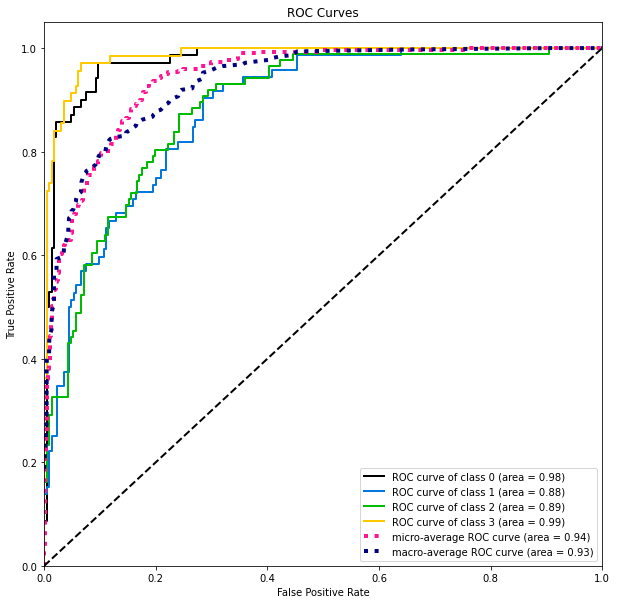

In [26]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, logreg.predict_proba(X_test_pd), figsize=(10, 10))
plt.show()

AUC >= 0.87, выглядит хорошо!!!

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca_results = pca.fit(X_train_pd)

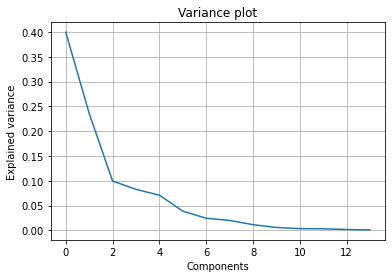

In [28]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.title('Variance plot')
plt.grid(':')
plt.show()

Видно, что достаточно 10 компонент, чтобы охрактеризовать выборку.

0.99% данных описывают 11 компонент. Оставим 11 штук.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

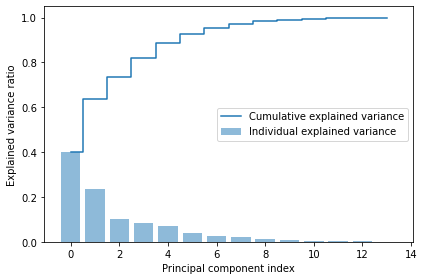

In [29]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
cumsum_understanding = pd.DataFrame(cum_sum_eigenvalues, index=range(1, len(cum_sum_eigenvalues) + 1))
cumsum_understanding

,0
1,0.399621
2,0.635428
3,0.734965
4,0.817866
5,0.888929
6,0.927742
7,0.952362
8,0.972510
9,0.984090
10,0.990044


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [51]:
pca = PCA(n_components=11, random_state=42)
X_train_pca = pca.fit_transform(X_train_pd)
X_test_pca = pca.fit_transform(X_test_pd)

In [52]:
lr1 = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500)

grid_parameters = {'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 2, 5, 10, 15, 20, 50]}

logreg2 = GridSearchCV(lr1, grid_parameters, scoring="f1_weighted", n_jobs=-1, verbose=10)
logreg3 = GridSearchCV(lr1, grid_parameters, scoring="accuracy", n_jobs=-1, verbose=10)

In [53]:
clf2 = logreg2.fit(X_train_pca, y_train)
clf3 = logreg3.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


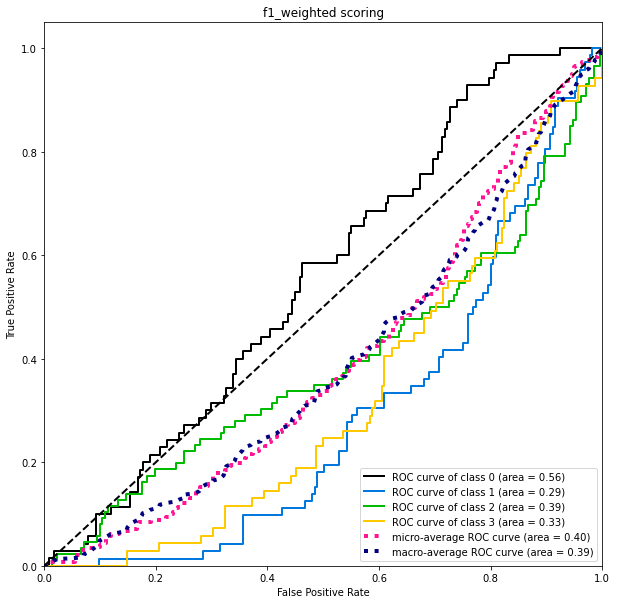

In [54]:
plot_roc(y_test, logreg2.predict_proba(X_test_pca), figsize=(10, 10))
plt.title("f1_weighted scoring")
plt.show()

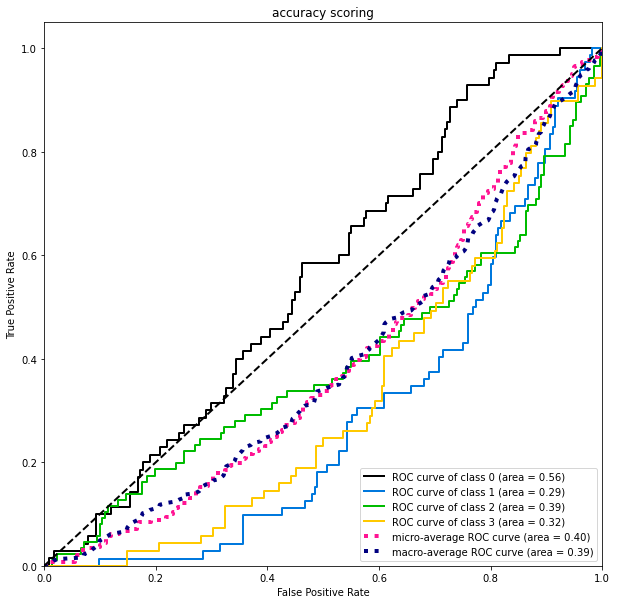

In [55]:
plot_roc(y_test, logreg3.predict_proba(X_test_pca), figsize=(10, 10))
plt.title("accuracy scoring")
plt.show()

Что-то непонятное...

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [36]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [37]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [38]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [39]:
# YOUR CODE HERE